<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Valentin Pertierra

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin((2\pi.f_0 + \phi_0).k/f_s),\space\space \forall k \in \Bbb{Z} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [1]:
""" 
brief:  Generador de señales senoidal, con argumentos

fs:     frecuencia de muestreo de la señal [Hz]
N:      cantidad de muestras de la señal a generar
f0:     frecuencia de la senoidal [Hz]
a0:     amplitud pico de la señal [V]
p0:     fase de la señal sinusoidal [rad]

como resultado la señal devuelve:

signal: senoidal evaluada en cada instante 
tt:     base de tiempo de la señal
"""
def generador_senoidal (fs, f0, N, a0=1, p0=0):

    # comienzo de la función
    # Genero un vector con el tiempo
    tt = np.linspace(0,(N-1)/fs,N)
    
    # Genero vector con los resultados
    signal = a0*np.sin(tt*2*np.pi*f0+p0)
        
    # fin de la función
    return tt, signal

In [2]:
""" 
Funcion para generar una señal cuadrada 
N: cantidad de muestras
fs: frecuencia de muestreo [Hz]
D: duty 0<D<1
f0: frecuencia [Hz]
a0: amplitud [V]
"""
def generador_cuadrada(fs, f0, N, a0, D):
    
    # comienzo de la función
    # Genero un vector con el tiempo
    tt = np.linspace(0,(N-1)/fs,N)
    
    # Genero un periodo de la señal cuadrada
    T1 = a0* np.ones(int(D*fs/f0))
    T2 = -a0* np.ones(int((1-D)*fs/f0)) 
        
    T = np.concatenate((T1, T2), axis=None)
    
    # Caculo la cantidad de periodos segun la cantidad de muestras
    Np = np.ceil(N/len(T))
    
    signal = []
    for i in range(int(Np)):
        signal = np.concatenate((signal, T), axis=None)
    
    signal = signal[:N]
    
    # fin de la función
    return tt, signal

In [3]:
""" 
Función para generar una señal triangular
N: cantidad de muestras
fs: frecuencia de muestreo [Hz]
S: punto de simetria 0<D<1
f0: frecuencia [Hz]
a0: amplitud [V]
"""
def generador_triangular(fs, f0, N, a0, S):
    
    # Comienzo de la función
    # Genero un vector con el tiempo
    tt = np.linspace(0,(N-1)/fs,N)
    
    # Genero un periodo de la señal triangular
    T1 = S/f0
    tt1 = np.linspace(0,T1,fs*T1)
    y1 = (a0/T1)*tt1
    
    T2 = (1-S)/f0
    tt2 = np.linspace(0,T2,fs*T2)
    y2 = (-a0/T2)*tt2 + a0
    
    T = np.concatenate((y1, y2), axis=None)
    
    # Caculo la cantidad de periodos segun la cantidad de muestras
    Np = np.ceil(N/len(T))
    
    signal = []
    for i in range(int(Np)):
        signal = np.concatenate((signal, T), axis=None)
    
    signal = signal[:N]
    
    # fin de la función
    return tt, signal

In [4]:
'''  
Funcion para generar una señal de ruido blanco (gaussiano)  
N: cantidad de muestras
fs: frecuencia de muestreo
u: media
v: varianza
'''  
def genRuidoNormal(u,v,N,fs):
    
    # Genero un vector con el tiempo
    t = np.linspace(0,(N-1)/fs,N)
    
    # Genero un vector con la señal aleatoria de Nx1
    v = np.sqrt(v)
    y = v*np.random.randn(N,1)+u
    
    y = np.transpose(y)
    y = np.reshape(y,N)
    
    return t,y

a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from pandas import DataFrame
from IPython.display import HTML
from time import time

# Insertar aquí el código para inicializar tu notebook
########################################################


In [6]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


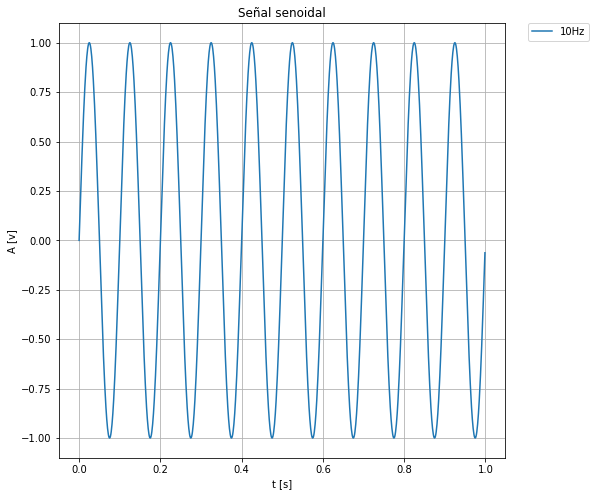

In [7]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

tt,signal = generador_senoidal(fs, f0, N, a0, p0)

plt.figure(figsize=(8,8))
plt.plot(tt,signal,label=str(f0)+"Hz")
plt.title("Señal senoidal")
plt.xlabel("t [s]")
plt.ylabel("A [v]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Suponiendo que la señal muestreada se encuentra dentro de la banda digital, es decir, entre $0 < f_{0} < \frac{f_{s}}{2}$ se podría inferir la frecuencia contando los periodos en un segundo. Si no hacemos la suposición anterior no podemos asegurar que la frecuencia de la señal sea la que estamos infiriendo de forma gráfica.  
</div>

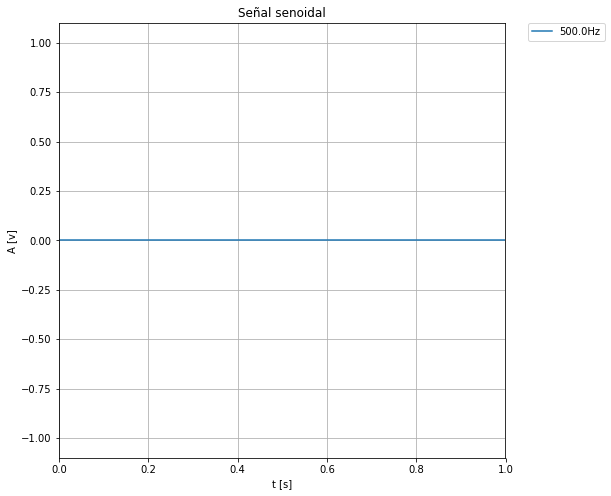

In [8]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

tt,signal = generador_senoidal(fs, f0, N, a0, p0)

plt.figure(figsize=(8,8))
plt.plot(tt,signal,label=str(f0)+"Hz")
plt.title("Señal senoidal")
plt.xlabel("t [s]")
plt.ylabel("A [v]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,tt[-1],-1.1,1.1])
plt.grid(True)
plt.show()

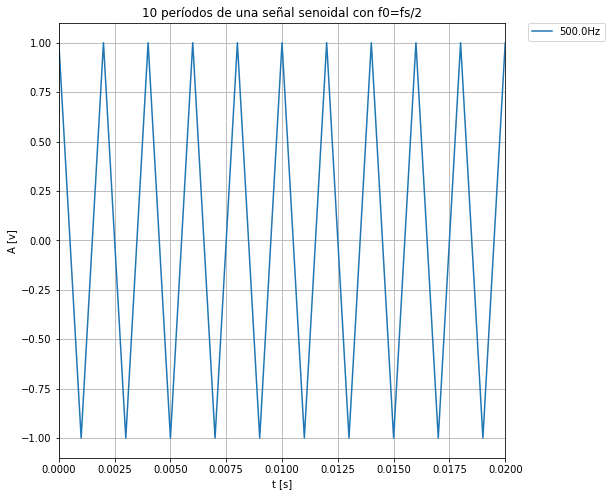

In [9]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

tt,signal = generador_senoidal(fs, f0, N, a0, p0)

plt.figure(figsize=(8,8))
plt.plot(tt,signal,label=str(f0)+"Hz")
plt.title("10 períodos de una señal senoidal con f0=fs/2")
plt.xlabel("t [s]")
plt.ylabel("A [v]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,10/f0,-1.1,1.1])
plt.grid(True)
plt.show()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En forma gráfica no se pueden deducir los parámetros de la señal, ya que no se observa ninguna señal para el caso a.2 y una señal triangular para el caso a.3, siendo en realidad una señal senoidal con frecuencia $\frac{f_{s}}{2}$. 
 

</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Esto se debe a que al muestrear con $f_{s}$ una señal cuya frecuencia es $\frac{f_{s}}{2}$ se obtienen 2 puntos por cada período de la señal, en el caso a.1 se muestrea cuando la señal cruza por cero obteniendo como resultado ninguna señal. En el caso a.2 se muestrea en los máximos de la senoidal, es decir, 1 y -1 obteniendo una señal triangular. Al modificar la fase $f_{0}$ se obtiene una señal triangular con diferentes amplitudes.
</div>

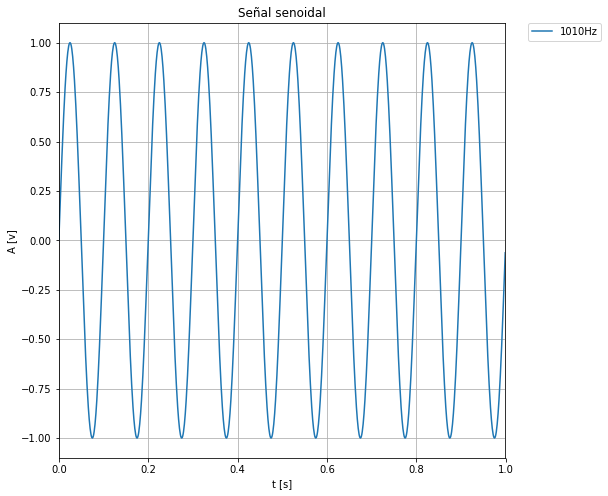

In [10]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

tt,signal = generador_senoidal(fs, f0, N, a0, p0)

plt.figure(figsize=(8,8))
plt.plot(tt,signal,label=str(f0)+"Hz")
plt.title("Señal senoidal")
plt.xlabel("t [s]")
plt.ylabel("A [v]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0,tt[-1],-1.1,1.1])
plt.grid(True)
plt.show()


¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No es posible diferenciarlas en forma gráfica, ni mirando el espectro, ya que se observaría lo mismo en ambos casos. En el punto a.4 la señal tiene una frecuencia $f_{0} > \frac{f_{s}}{2}$ y al muestrearla, lo que se obtiene es la convolución se la componente en $f_{0}$ con un peine de deltas separadas $f_{s}$. Esto genera que aparezcan réplicas de la componente  espaciadas $f_{s}$ en todo el espectro. Lo que se observa en el gráfica es la réplica ubicada en la banda digita ${f_{0}}’= f_{0}-f_{s}$  
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Para solucionar este problema hay que filtrar la señal analógica antes de muestrearla y de esta forma eliminar toda componente que se encuentre fuera de la banda digital. El espectro de la señal analógica tiene que estar limitado $BW < \frac{f_{s}}{2}$ antes del muestreo.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

In [11]:
# Implementación del algoritmo para calcular la DFT de una señal
def DFT(Xn):
    
    # Determino cuantas muestras tiene la señal
    N = len(Xn)
    
    Xk = np.zeros(N, dtype ='c16')
    
    for k in range(N-1):
        for n in range(N-1):
            Xk[k] += Xn[n]*np.exp(-1j*2*np.pi*k*n/N)
        
    return Xk

C:\Users\Valentin\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\Valentin\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


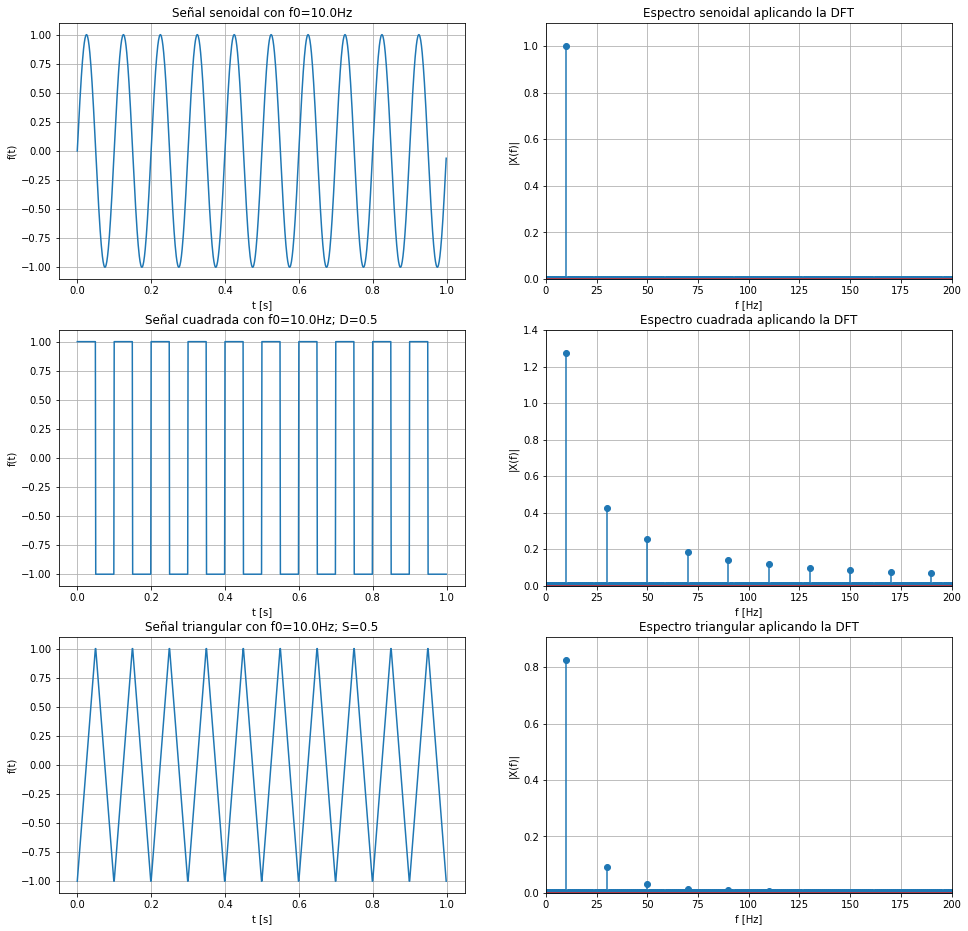

In [12]:
# Prueba del algoritmo de la DFT
# Parámetros de las señales
N = 1000
fs = 1000

a0 = 1
p0 = 0
f0 = fs/100

D = 0.5
S = 0.5

# Genero distintas señales para probar el algoritmo de la DFT
tts,senoidal = generador_senoidal(fs,f0,N,a0,p0)
ttc,cuadrada = generador_cuadrada(fs, f0, N, a0, D)
ttt,triangular = generador_triangular(fs, f0, N, a0*2, S)

# Hago que la triangular tenga media nula
triangular = triangular - a0

# Genero vector con fecuencias
df = fs/N
ff = np.arange(int(N/2))*df

# Hago la DFT y normalizo el espectro
DFTsenoidal = DFT(senoidal)*(2/N)
DFTcuadrada = DFT(cuadrada)*(2/N)
DFTtriangular = DFT(triangular)*(2/N)

# Me quedo con la mitad de las muestras
DFTsenoidal = DFTsenoidal[:int(N/2)]
DFTcuadrada = DFTcuadrada[:int(N/2)]
DFTtriangular = DFTtriangular[:int(N/2)]

# Grafico las señales y el modulo del espectro
plt.figure(figsize=(16,16))
plt.subplot(321)
plt.title("Señal senoidal con f0="+str(f0)+"Hz")
plt.plot(tts, senoidal)           
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(322)
plt.title("Espectro senoidal aplicando la DFT")
plt.stem(ff, np.absolute(DFTsenoidal))           
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.axis([0,200,0,np.amax(np.absolute(DFTsenoidal))*1.1])
plt.grid(True)

plt.subplot(323)
plt.title("Señal cuadrada con f0="+str(f0)+"Hz; D="+str(D))
plt.plot(ttc, cuadrada)           
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(324)
plt.title("Espectro cuadrada aplicando la DFT")
plt.stem(ff, np.absolute(DFTcuadrada))           
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.axis([0,200,0,np.amax(np.absolute(DFTcuadrada))*1.1])
plt.grid(True)

plt.subplot(325)
plt.title("Señal triangular con f0="+str(f0)+"Hz; S="+str(S))
plt.plot(ttt, triangular)           
plt.xlabel('t [s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(326)
plt.title("Espectro triangular aplicando la DFT")
plt.stem(ff, np.absolute(DFTtriangular))           
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.axis([0,200,0,np.amax(np.absolute(DFTtriangular))*1.1])
plt.grid(True)

plt.show()

<div class="alert alert-block alert-info">
<b>2.b)</b> Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **resultados**.
</div>

In [13]:
# Comparación entre el timepo de ejecución del algoritmo de la DFT y la FFT

N = [16,32,64,128,256,512,1024,2048]
fs = 1000

# Parámetros de la señal
a0 = 1
p0 = 0
f0 = fs/4

# Vector con los los resultados
resultados = [ ['--','--']]

for n in N:

    tts,senoidal = generador_senoidal(fs,f0,n,a0,p0)

    tStartDFT = time()
    espectroDFT = DFT(senoidal)
    dtDFT = time()-tStartDFT

    tStartFFT = time()
    espectroFFT= fft(senoidal)
    dtFFT = time()-tStartFFT

    resultados.append(["%.5f"%dtDFT,"%.5f"%dtFFT])


df = DataFrame(resultados, columns=['tiempo transcurrido DFT (s)','tiempo transcurrido FFT (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido DFT (s),tiempo transcurrido FFT (s)
Tamaño de la señal N,--,--
16,0.00200,0.00000
32,0.00900,0.00000
64,0.03300,0.00000
128,0.13001,0.00000
256,0.51303,0.00000
512,2.09012,0.00000
1024,8.23347,0.00000
2048,33.15190,0.00000


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No se porque no puedo calcular el tiempo que se tarda en hacer la FFT. De todas formas se puede ver que hacer la DFT insume un tiempo conciderable a medida que aumenta la cantidad de muestras.  
</div>

<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [14]:
# Funcion para generar el espectro de una señal
def analizadorEspectro(yt,tt):

    #determino la frecuencia de muestreo
    Ts = tt[1]-tt[0]
    fs = 1/Ts

    #determino la cantidad de muestras de la señal (N)
    N = len(yt)

    # determino los valores de fecuencias
    df = fs/N
    f = np.arange(int(N/2))*df

    #aplico la fft a la señal y la normalizo
    yf = fft(yt)*(2/N)

    #me quedo con la mitad de las muestras
    yf = yf[:int(N/2)]

    return f,yf

,Frecuencia central,Primer adyacente,Resto de frecuencias,Energía total
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert$,$\sum_{i=F} \lvert X(f_i) \lvert^{2}$
,,,$F:f \neq f_0$,
$f_S/4$,1.41421,0.00000,0.00000,1.00000
$f_S/4+0.01$,1.41398,0.01429,0.17996,1.00000
$f_S/4+0.25$,1.27226,0.42539,3.98099,0.99902
$f_S/4+0.5$,0.90031,0.90032,6.07735,1.00000


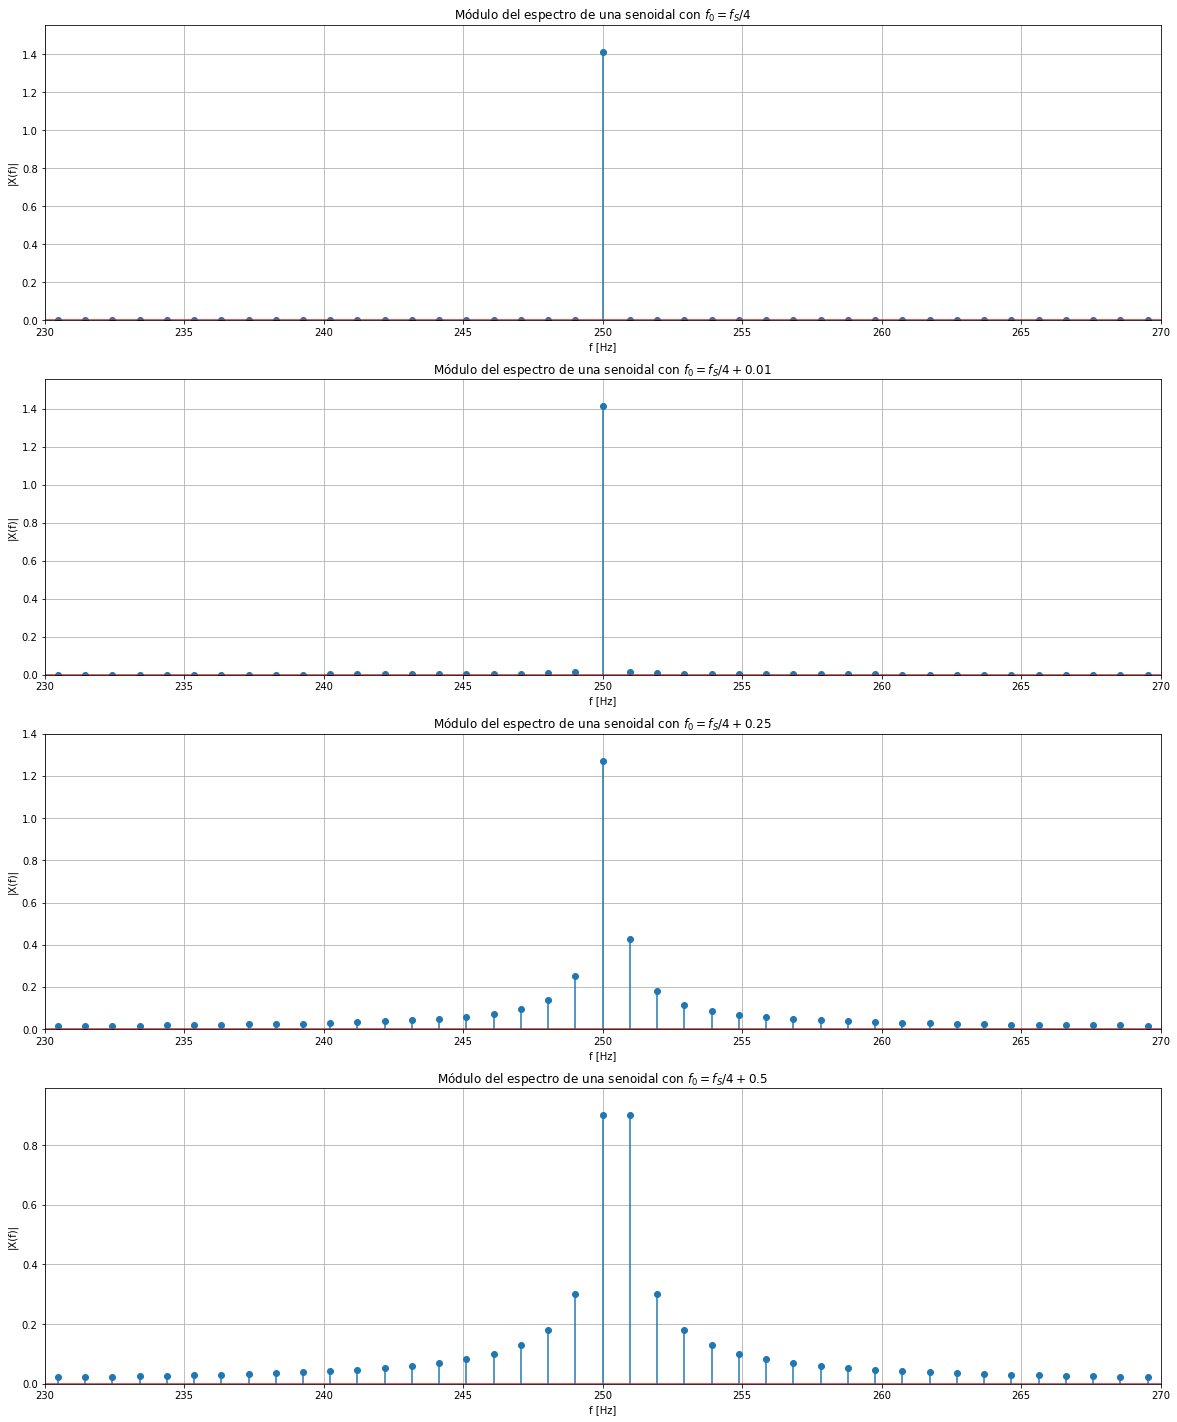

In [15]:
# Verificaición del efecto del leakage
# Parámetros de las señales
N = 1024
fs = 1000

# Hago que la señal este normalizada en energía
a0 = np.sqrt(2)
p0 = 0
f0 = fs/4

fd = [0,0.01,0.25,0.5]

# Vector para guardar los resultados
tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert$', '$\sum_{i=F} \lvert X(f_i) \lvert^{2}$'], 
                   ['',                        '',                           '$F:f \neq f_0$','                                  '] 
                 ]
graficoEspectro = []

for i in fd:
    
    f = (N/4+i)*fs/N
    tt,signal = generador_senoidal(fs,f,N,a0,p0)
    ff,espectro = analizadorEspectro(signal,tt)
    graficoEspectro.append(espectro)
    
    Xo = np.absolute(espectro[int(N/4)])            #|X(fo)|
    X1 = np.absolute(espectro[int(N/4)+1])          #|X(fo+1)|
    
    # Calculo la sumatoria de los módulos para todas las frecuencias
    Xj = 0
    for j in espectro:
        Xj = Xj+np.absolute(j)
        
    Xj = Xj-Xo      # A la sumatoria le resto |X(fo)|
    
    # Calculo la energía total
    energia = 0
    for j in espectro:
        energia = energia+np.absolute(j/2)**2
    energia = energia*2
        
    tus_resultados.append(["%.5f"%Xo,"%.5f"%X1,"%.5f"%Xj,"%.5f"%energia])

    
#Grafico los espectros
plt.figure(figsize=(20,25))
plt.subplot(411)
plt.title("Módulo del espectro de una senoidal con $f_0 = f_S/4$")
plt.stem(ff, np.absolute(graficoEspectro[0]))          
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.axis([f0-20,f0+20,0,np.amax(np.absolute(graficoEspectro[0]))*1.1])
plt.grid(True)

plt.subplot(412)
plt.title("Módulo del espectro de una senoidal con $f_0 = f_S/4+0.01$")
plt.stem(ff, np.absolute(graficoEspectro[1]))           
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.axis([f0-20,f0+20,0,np.amax(np.absolute(graficoEspectro[1]))*1.1])
plt.grid(True)

plt.subplot(413)
plt.title("Módulo del espectro de una senoidal con $f_0 = f_S/4+0.25$")
plt.stem(ff, np.absolute(graficoEspectro[2]))           
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.axis([f0-20,f0+20,0,np.amax(np.absolute(graficoEspectro[2]))*1.1])
plt.grid(True)

plt.subplot(414)
plt.title("Módulo del espectro de una senoidal con $f_0 = f_S/4+0.5$")
plt.stem(ff, np.absolute(graficoEspectro[3]))           
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.axis([f0-20,f0+20,0,np.amax(np.absolute(graficoEspectro[3]))*1.1])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias','Energía total'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())

<div class="alert alert-block alert-warning">
En este punto lo que se logró evidenciar es el efecto del leakage o desparramo espectral que se da cuando la frecuencia de la señal que se está muestreando no es múltiplo de la resolución espectral $ \Delta f= \frac{f_{s}}{N}$. En el primer caso cuando $f_{0}=\frac{f_{s}}{4}$ la componente coincide con un bin y no se genera ningún desparramo de energía. De la tabla se puede ver que esa componente contiene toda la energía de la señal. A medida que la señal muestreada varia su frecuencia entre $\frac{f_{s}}{4} < f_{0} < \frac{f_{s}}{4}+\Delta f $ se observa que comienzan a aparecer componentes en los bins adyacentes. Cuando   $ f_{0}=\frac{f_{s}}{4}+\frac{\Delta f }{2}$ la componente de la señal muestreada cae entre dos bins y el desparramo de energía es máximo, se puede ver en la tabla que la energía de los bins contiguos es idéntica.  
En todos los casos la energía total no varía, se mantiene unitaria pero se desparrama en el espectro. El efecto del leakage impone un piso de ruido en el espectro y más en las cercanías de la componente que género el desparramo.      


</div>

<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$. 
</div>

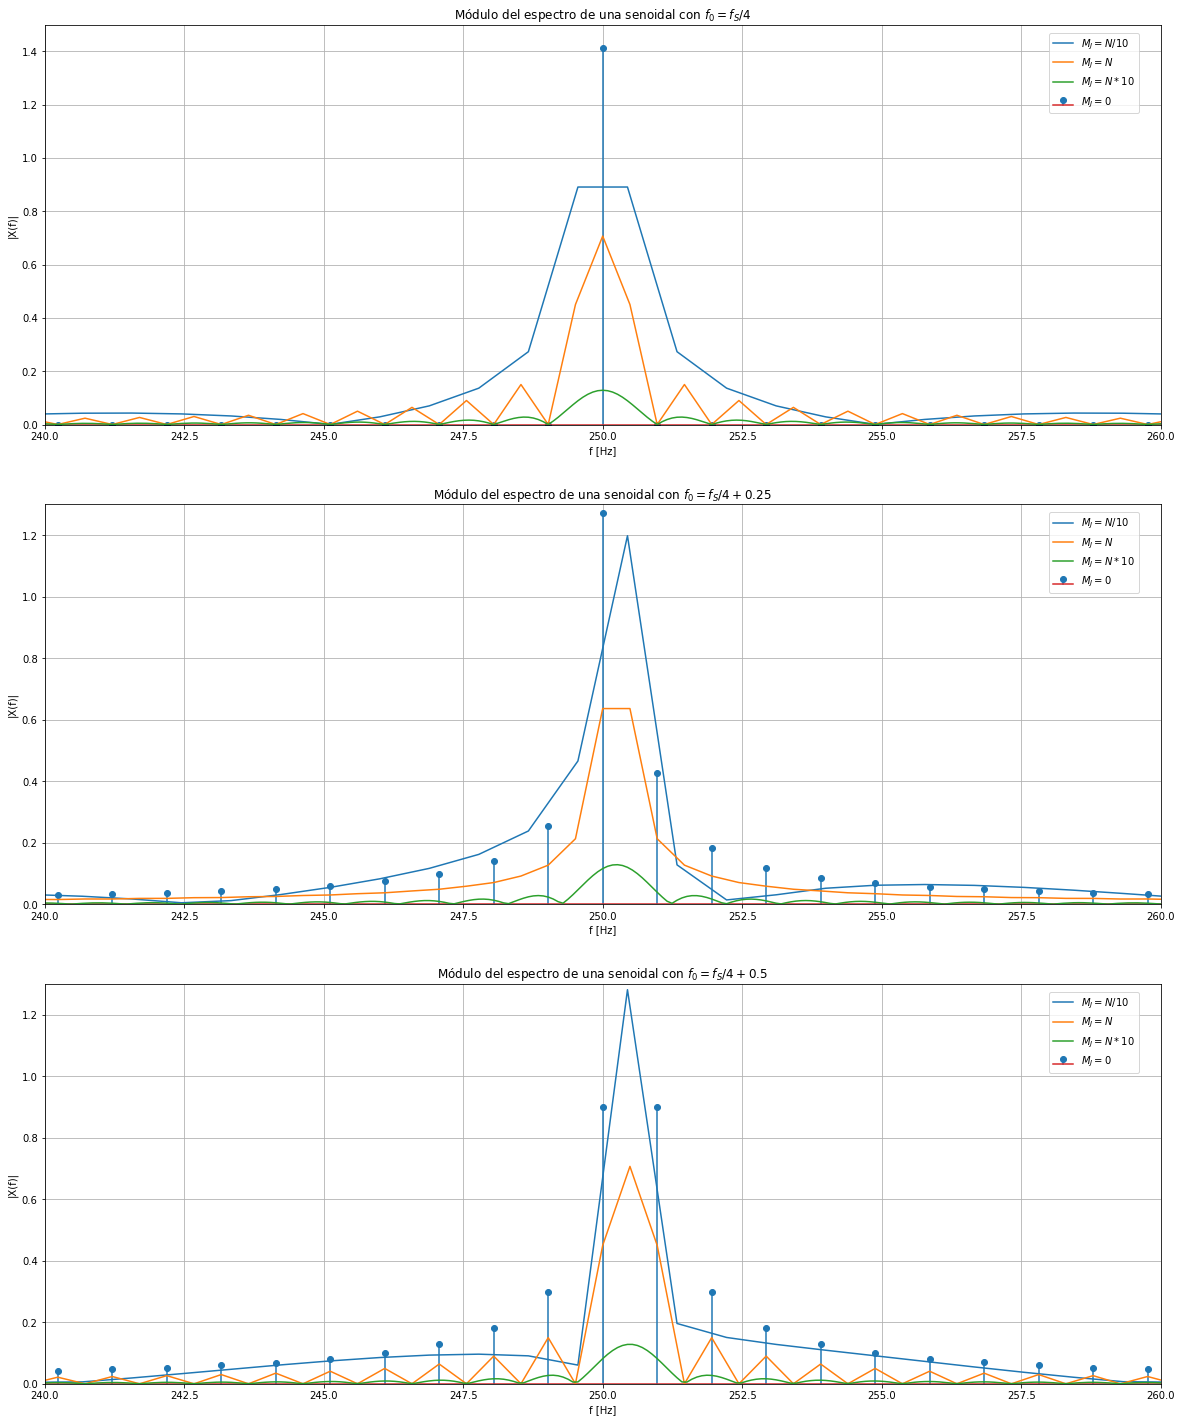

In [16]:
# Parámetros de las señales
N = 1024
fs = 1000

a0 = np.sqrt(2)
p0 = 0
f0 = fs/4

fd = [0,0.25,0.5]
Mj = [0,int(N/10),N,10*N]

graficoEspectro = []
energiaTotal = []
for i in Mj:
    for fi in fd:
        f = (N/4+fi)*fs/N
        tt,signal = generador_senoidal(fs,f,N+i,a0,p0)
        signal[N:]= 0                                       # Hago cero los valores desde N hasta el final de la señal
        
        ff,espectro = analizadorEspectro(signal,tt)
        graficoEspectro.append([ff,espectro]) 


#Grafico los espectros
plt.figure(figsize=(20,25))
plt.subplot(311)
plt.title("Módulo del espectro de una senoidal con $f_0=f_S/4$")
plt.stem(graficoEspectro[0][0], np.absolute(graficoEspectro[0][1]),label = "$M_J=0$")
plt.plot(graficoEspectro[3][0], np.absolute(graficoEspectro[3][1]),label = "$M_J=N/10$") 
plt.plot(graficoEspectro[6][0], np.absolute(graficoEspectro[6][1]),label = "$M_J=N$")
plt.plot(graficoEspectro[9][0], np.absolute(graficoEspectro[9][1]),label = "$M_J=N*10$")
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.legend(bbox_to_anchor=(0.90, 0.98), loc=2, borderaxespad=0.)
plt.axis([f0-10,f0+10,0,1.5])
plt.grid(True)

plt.subplot(312)
plt.title("Módulo del espectro de una senoidal con $f_0=f_S/4+0.25$")
plt.stem(graficoEspectro[1][0], np.absolute(graficoEspectro[1][1]),label = "$M_J=0$")
plt.plot(graficoEspectro[4][0], np.absolute(graficoEspectro[4][1]),label = "$M_J=N/10$") 
plt.plot(graficoEspectro[7][0], np.absolute(graficoEspectro[7][1]),label = "$M_J=N$")
plt.plot(graficoEspectro[10][0], np.absolute(graficoEspectro[10][1]),label = "$M_J=N*10$")
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.legend(bbox_to_anchor=(0.90, 0.98), loc=2, borderaxespad=0.)
plt.axis([f0-10,f0+10,0,1.3])
plt.grid(True)

plt.subplot(313)
plt.title("Módulo del espectro de una senoidal con $f_0=f_S/4+0.5$") 
plt.stem(graficoEspectro[2][0], np.absolute(graficoEspectro[2][1]),label = "$M_J=0$")
plt.plot(graficoEspectro[5][0], np.absolute(graficoEspectro[5][1]),label = "$M_J=N/10$") 
plt.plot(graficoEspectro[8][0], np.absolute(graficoEspectro[8][1]),label = "$M_J=N$")
plt.plot(graficoEspectro[11][0], np.absolute(graficoEspectro[11][1]),label = "$M_J=N*10$")
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.legend(bbox_to_anchor=(0.90, 0.98), loc=2, borderaxespad=0.)
plt.axis([f0-10,f0+10,0,1.3])
plt.grid(True)


**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al aumentar la cantidad de ceros que se agregan al final de la señal muestreada, aumenta la cantidad de muestras N y por lo tanto se incrementa la resolución espectral de la FFT, ya que está dada por $ \Delta f= \frac{f_{s}}{N}$. Pero no aumenta de la misma forma la resolución espectral de la señal muestreada, la cual está determinada por $ \Delta R= \frac{1}{T}$, donde T es el tiempo de la señal sin agregar ceros. Esto último se debe a que al agregar ceros se está multiplicando la señal muestreada con una señal cuadrada, lo que es equivalente a la convolución del espectro de la señal con una función sinc. $ \Delta R= \frac{1}{T}$ es el espacio entre los valores nulos de dicha función sinc.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se puede ver que el al utilizar la técnica de zero padding podemos determinar el valor de la frecuencia de una señal senoidal desintonizada,  mediante la ubicación del lóbulo mayor de la sinc. A medida que aumentamos la cantidad de ceros tenemos mayor resolución espectral de la FFT lo que nos permite tener mayor precisión para determinar el valor máximo de la sinc y en consecuencia el valor de la frecuencia de la señal. 
</div>

<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


In [17]:
# Esta función la utilizo para calcular la energía de las señales
def energiaSignal(tt,signal,f0):
    
    # Calculo la energia de la señal en el tiempo
    energiaTiempo=0
    for x in signal:
        energiaTiempo += x**2
        
    energiaTiempo = energiaTiempo/N    
    
    # Obtengo el espectro
    ff,espectro = analizadorEspectro(signal,tt)
    
    # Calculo la energia en el espectro
    # Cuando hago la fft multiplico el espectro por 2/N para
    # escalarlo (porque me quedo con la mitad). Pero para calcular la energia
    # necesito elevar al cuadrado el modulo de todo el espectro. Por esto lo 
    # divido por 2 y hago la sumatoria de los cuadrados del modulo, de esta 
    # forma obtengo la mitad de la energia y al final la duplico
    energiaTotal = 0
    for x in espectro:
        energiaTotal += np.absolute(x/2)**2     
    
    energiaTotal = energiaTotal*2
    
    # Calculo la energia en |X(f0)|
    energiaF0 = (np.absolute(espectro[int((f0/fs)*N)]/2)**2)*2
    
    # Obtengo la frecuencia de la cmoponente con mayor energia
    moduloEspectro = np.absolute(espectro)
    binMaxAmplitud = np.argmax(moduloEspectro)
    
    return energiaTotal,energiaF0,binMaxAmplitud



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**4_a** Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1,1,8.78906Hz = 9*(fs/N)
,,,
simulación,1.00000,1.00000,8.78906Hz = 9*(fs/N)


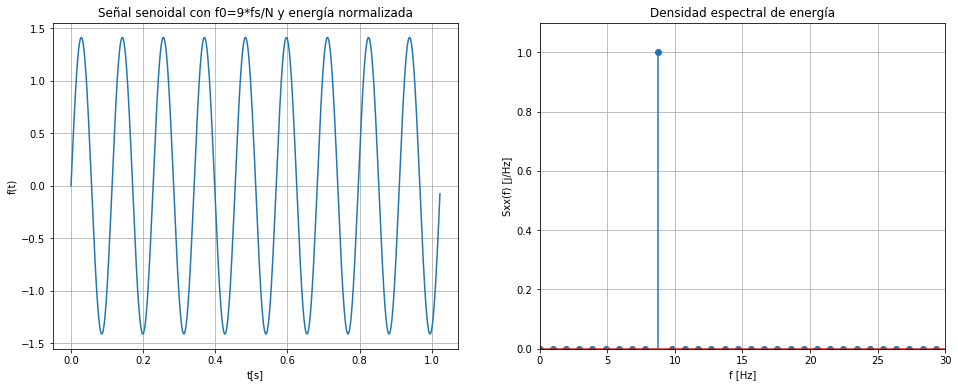

In [18]:
N = 1024
fs = 1000

# Parámetros de la señal
a0 = np.sqrt(2)     #senoidal con energía unitaria
p0 = 0
f0 = 9*fs/N

# Genero la señal
tt,signal = generador_senoidal(fs,f0,N,a0,p0)

# Obtengo el espectro de la señal
ff,espectro = analizadorEspectro(signal,tt)

# Obtengo la densidad espectral de energía
DEE = 2*np.absolute(espectro/2)**2

# Calculo la energia de la señal
energiaTotal,energiaF0,binMaxAmplitud = energiaSignal(tt,signal,f0)

# Vector con los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ["1", "1", "%.5f"%(9*(fs/N))+"Hz = 9*(fs/N)" ], 
                  ['', '', ''], 
                  ["%.5f" %energiaTotal,"%.5f" %energiaF0,"%.5f" %(binMaxAmplitud*(fs/N))+"Hz = %d"%binMaxAmplitud+"*(fs/N)"] 
                 ]

# Grafico la señal y su densidad espectral de energía
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Señal senoidal con f0=9*fs/N y energía normalizada")
plt.plot(tt,signal)           
plt.xlabel('t[s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(122)
plt.title("Densidad espectral de energía")
plt.stem(ff, DEE)           
plt.xlabel('f [Hz]')
plt.ylabel('Sxx(f) [j/Hz]')
plt.axis([0,30,0,np.amax(DEE)*1.1])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**4_b 1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9=0.11111,0.11111,8.78906Hz = 9*(fs/N)
,,,
simulación,0.11111,0.01234,7.81250Hz = 8*(fs/N)


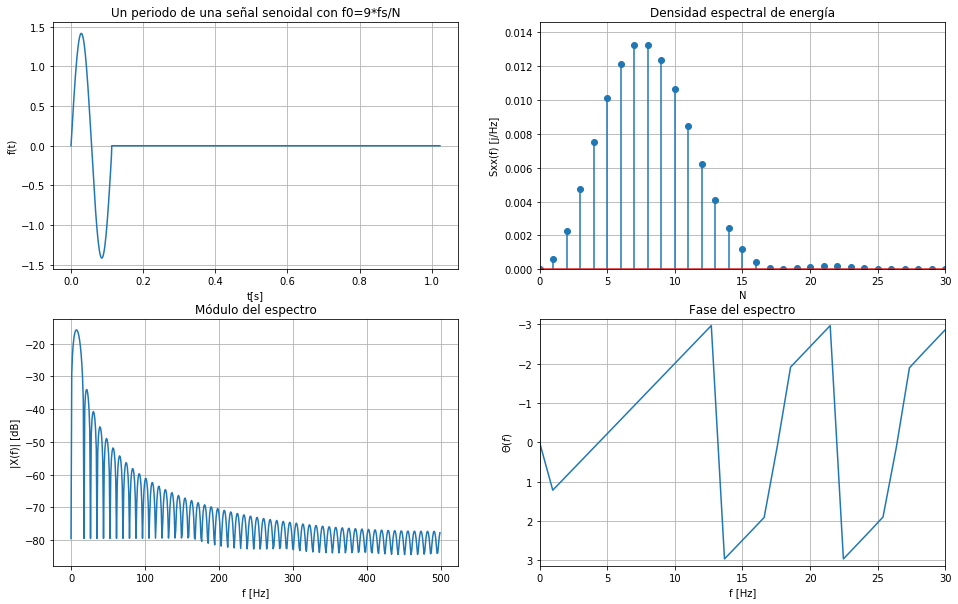

In [19]:
N = 1024
fs = 1000

# Parámetros de la señal
a0 = np.sqrt(2)     # Senoidal con energía normalizada
#a0 = 4.242727       # Con este valor de aplitud toda la señal queda normalizada en energía
p0 = 0
f0 = 9*fs/N

# Genero la señal
tt,signal = generador_senoidal(fs,f0,N,a0,p0)
    
# Me quedo con un periodo de la senoidal
signal[int(fs/f0):]=0

# Obtengo el espectro de la señal
ff,espectro = analizadorEspectro(signal,tt)
esp4_b = espectro

# Obtengo la densidad espectral de energía
DEE = 2*np.absolute(espectro/2)**2

# Calculo la energia de la señal
energiaTotal,energiaF0,binMaxAmplitud = energiaSignal(tt,signal,f0)

# Vector con los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ["1/9=%.5f"%(1/9), "%.5f"%(1/9), "%.5f"%(9*(fs/N))+"Hz = 9*(fs/N)" ], 
                  ['', '', ''], 
                  ["%.5f" %energiaTotal,"%.5f" %energiaF0,"%.5f" %(binMaxAmplitud*(fs/N))+"Hz = %d"%binMaxAmplitud+"*(fs/N)"] 
                 ]

# Grafico la señal y su densidad espectral de energía
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title("Un periodo de una señal senoidal con f0=9*fs/N")
plt.plot(tt,signal)           
plt.xlabel('t[s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(222)
plt.title("Densidad espectral de energía")
plt.stem(ff*(N/fs), DEE)           
plt.xlabel('N')
plt.ylabel('Sxx(f) [j/Hz]')
plt.axis([0,30,0,np.amax(DEE)*1.1])
plt.grid(True)

plt.subplot(223)
plt.title("Módulo del espectro")
plt.plot(ff, 20*np.log10(np.absolute(espectro)))          
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)| [dB]')
#plt.axis([0,30,-60,0])
plt.grid(True)

plt.subplot(224)
plt.title("Fase del espectro")
plt.plot(ff, np.angle(espectro))           
plt.xlabel('f [Hz]')
plt.ylabel('$\Theta(f)$')
plt.axis([0,30,np.pi,-np.pi])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso lo que estamos haciendo al quedarnos con un solo período de la señal es multiplicar la señal senoidal del caso anterior con una señal cuadrada. Esto da como resultado en el espectro  la convolución de la componente de la senoidal con la función sinc correspondiente al espectro de la cuadrada.  
La energía total es $\frac{1}{9} $ de la energía total de la senoidal entera, esto tiene sentido ya que solo me quede con 1 período de los 9 del caso anterior. La componente de mayor energía no está en  $9.\frac{f_s}{N} $ como había predicho sino que está en $8.\frac{f_s}{N}$  

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**4_c** 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9=0.11111,0.11111,8.78906Hz = 9*(fs/N)
,,,
simulación,0.11111,0.01235,7.81250Hz = 8*(fs/N)


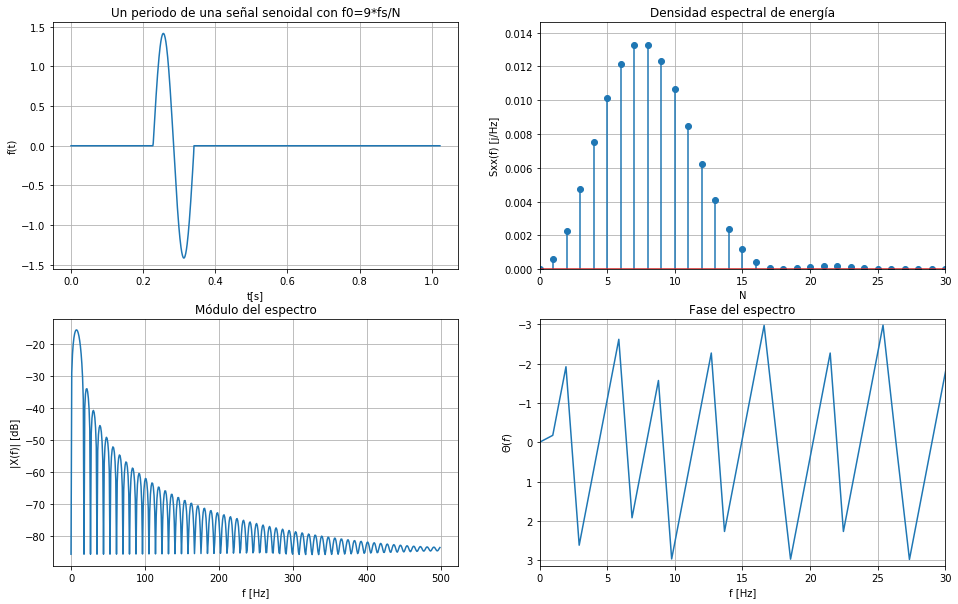

In [20]:
N = 1024
fs = 1000

# Parámetros de la señal
a0 = np.sqrt(2)     #senoidal con energía unitaria
#a0 = 4.242727       # Con este valor de aplitud toda la señal queda normalizada en energía
p0 = 0
f0 = 9*fs/N

# Genero la señal
tt,signal = generador_senoidal(fs,f0,N,a0,p0)

# Pongo en cero los dos primeros ciclos, dejo uno y pongo el resto en cero
signal[:int(2*fs/f0)+1]=0       #le sume 1 por al redondear la señal no quedaba bien
signal[int(3*fs/f0):]=0

# Obtengo el espectro de la señal
ff,espectro = analizadorEspectro(signal,tt)
esp4_c = espectro

# Obtengo la densidad espectral de energía
DEE = 2*np.absolute(espectro/2)**2

# Calculo la energia de la señal
energiaTotal,energiaF0,binMaxAmplitud = energiaSignal(tt,signal,f0)

# Vector con los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ["1/9=%.5f"%(1/9), "%.5f"%(1/9), "%.5f"%(9*(fs/N))+"Hz = 9*(fs/N)" ], 
                  ['', '', ''], 
                  ["%.5f" %energiaTotal,"%.5f" %energiaF0,"%.5f" %(binMaxAmplitud*(fs/N))+"Hz = %d"%binMaxAmplitud+"*(fs/N)"] 
                 ]

# Grafico la señal y su densidad espectral de energía
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title("Un periodo de una señal senoidal con f0=9*fs/N")
plt.plot(tt,signal)           
plt.xlabel('t[s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(222)
plt.title("Densidad espectral de energía")
plt.stem(ff*(N/fs), DEE)           
plt.xlabel('N')
plt.ylabel('Sxx(f) [j/Hz]')
plt.axis([0,30,0,np.amax(DEE)*1.1])
plt.grid(True)

plt.subplot(223)
plt.title("Módulo del espectro")
plt.plot(ff, 20*np.log10(np.absolute(espectro)))          
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)| [dB]')
#plt.axis([0,30,-60,0])
plt.grid(True)

plt.subplot(224)
plt.title("Fase del espectro")
plt.plot(ff, np.angle(espectro))           
plt.xlabel('f [Hz]')
plt.ylabel('$\Theta(f)$')
plt.axis([0,30,np.pi,-np.pi])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La diferencia con el caso anterior es el desplazamiento de período en el tiempo, que no produce ningún cambio en el módulo del espectro y se manifiesta en la fase del espectro.   
Se puede ver que las fase del espectro en este caso y el caso anterior son distintas

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**4_d** 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,2/9=0.22222,0.11111,8.78906
,,,
simulación,0.23611,0.01572,7.81250Hz = 8*(fs/N)


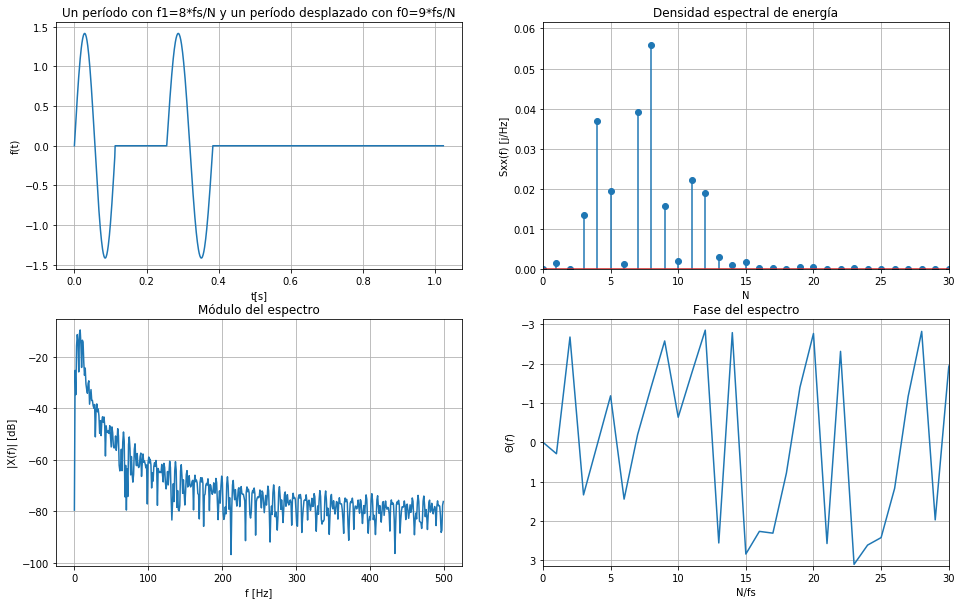

In [21]:
N = 1024
fs = 1000
a0 = np.sqrt(2)

# Parametros de la 1° senoidal
a1 = a0     #senoidal con energia unitaria
p1 = 0
f1 = 9*fs/N

# Parametros de la 2° senoidal
a2 = a0     #senoidal con energia unitaria
p2 = 0
f2 = 8*fs/N

# Genero la senoidal 1 
tt,signal_1 = generador_senoidal(fs,f1,N,a1,p1)

# Me quedo con un periodo de la senoidal
signal_1[int(fs/f1):]=0

# Genero la senoidal 2 
tt,signal_2 = generador_senoidal(fs,f2,N,a2,p2)

# Pongo en cero los dos primeros ciclos, dejo uno y pongo el resto en cero
signal_2[:int(2*fs/f2)+1]=0       #le sume 1 por al redondear la señal no quedaba bien
signal_2[int(3*fs/f2):]=0

#sumo las senoidales
signal = signal_1 + signal_2

# Obtengo el espectro de la señal
ff,espectro = analizadorEspectro(signal,tt)

# Obtengo la densidad espectral de energía
DEE = 2*np.absolute(espectro/2)**2

# Calculo la energia de la señal
energiaTotal,energiaF0,binMaxAmplitud = energiaSignal(tt,signal,f0)

# Vector con los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ["2/9=%.5f"%(2/9), "%.5f"%(1/9), "%.5f"%(9*(fs/N))+" " ], 
                  ['', '', ''], 
                  ["%.5f" %energiaTotal,"%.5f" %energiaF0,"%.5f" %(binMaxAmplitud*(fs/N))+"Hz = %d"%binMaxAmplitud+"*(fs/N)"] 
                 ]

# Grafico la señal y su densidad espectral de energía
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title("Un período con f1=8*fs/N y un período desplazado con f0=9*fs/N")
plt.plot(tt,signal)           
plt.xlabel('t[s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(222)
plt.title("Densidad espectral de energía")
plt.stem(ff*(N/fs), DEE)           
plt.xlabel('N')
plt.ylabel('Sxx(f) [j/Hz]')
plt.axis([0,30,0,np.amax(DEE)*1.1])
plt.grid(True)

plt.subplot(223)
plt.title("Módulo del espectro")
plt.plot(ff, 20*np.log10(np.absolute(espectro)))          
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)| [dB]')
plt.grid(True)

plt.subplot(224)
plt.title("Fase del espectro")
plt.plot(ff*(N/fs), np.angle(espectro))           
plt.xlabel('N/fs')
plt.ylabel('$\Theta(f)$')
plt.axis([0,30,np.pi,-np.pi])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Mirando el grafico del módulo del espectro no podría asegurar que las componentes que se encuentran en $5.\frac{f_s}{N}$ y $8.\frac{f_s}{N}$ son las componentes de los períodos. Este espectro se obtiene como resultado de la suma de la convolucion entre una senoidal de $9.\frac{f_s}{N}$ con una señal cuadrada y una senoidal de $8.\frac{f_s}{N}$ desplazada en el tiempo con otra señal cuadrada. El solapamiento de estos espectros produce que dependiendo del módulo y fase de cada componente se obtengan como resultado componentes que se suman o restan perdiendo la noción de cuales corresponden a los periodos de las senoidales.
</div>

<div class="alert alert-block alert-warning">
Si sumo los espectros de las señales de los dos casos anteriores (un período de $9.\frac{f_s}{N}$ y el mismo desplazado en tiempo) debería obtener un espectro similar al de este caso. Solo de diferencian en la frecuencia de uno de los períodos. 
</div>

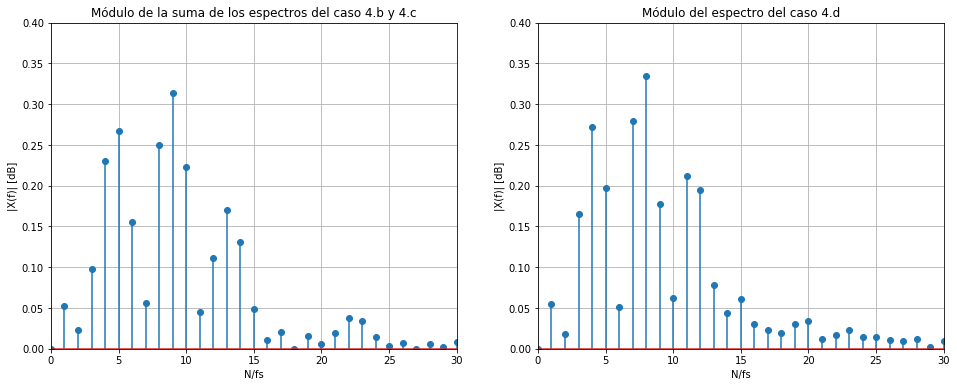

In [22]:
espectroSuma = esp4_c+esp4_b

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Módulo de la suma de los espectros del caso 4.b y 4.c")
plt.stem(ff*(N/fs), np.absolute(espectroSuma)) 
plt.xlabel('N/fs')
plt.ylabel('|X(f)| [dB]')
plt.axis([0,30,0,0.4])
plt.grid(True)

plt.subplot(122)
plt.title("Módulo del espectro del caso 4.d")
plt.stem(ff*(N/fs), np.absolute(espectro))
plt.xlabel('N/fs')
plt.ylabel('|X(f)| [dB]')
plt.axis([0,30,0,0.4])
plt.grid(True)

<div class="alert alert-block alert-warning">
Como se puede ver los módulos de los espectros tienen una forma similar, con la diferencia que el espectro de la suma de las señales de los casos 4.b y 4.c esta desplazado un bin a la derecha respecto al espectro del caso 4.d. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**4_e** Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,2/9=0.22222,0.11111,8.78906Hz = 9*(fs/N)
,,,
simulación,0.23611,0.04903,8.78906Hz = 9*(fs/N)


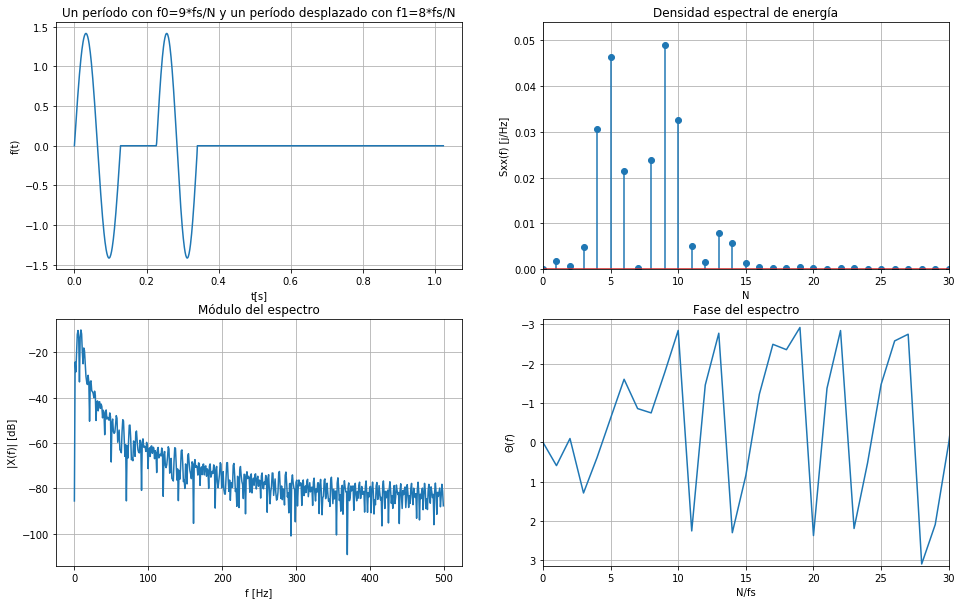

In [23]:
N = 1024
fs = 1000

# Parametros de la 1° senoidal
a1 = a0     #senoidal con energia unitaria
p1 = 0
f1 = 8*fs/N

# Parametros de la 2° senoidal
a2 = a0     #senoidal con energia unitaria
p2 = 0
f2 = 9*fs/N

# Genero la senoidal 1 
tt,signal_1 = generador_senoidal(fs,f1,N,a1,p1)

# Me quedo con un periodo de la senoidal
signal_1[int(fs/f1):]=0

# Genero la senoidal 2 
tt,signal_2 = generador_senoidal(fs,f2,N,a2,p2)

# Pongo en cero los dos primeros ciclos, dejo uno y pongo el resto en cero
signal_2[:int(2*fs/f2)+1]=0       #le sume 1 por al redondear la señal no quedaba bien
signal_2[int(3*fs/f2):]=0

#sumo las senoidales
signal = signal_1 + signal_2

# Obtengo el espectro de la señal
ff,espectro = analizadorEspectro(signal,tt)

# Obtengo la densidad espectral de energía
DEE = 2*np.absolute(espectro/2)**2

# Calculo la energia de la señal
energiaTotal,energiaF0,binMaxAmplitud = energiaSignal(tt,signal,f0)

# Vector con los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ["2/9=%.5f"%(2/9), "%.5f"%(1/9), "%.5f"%(9*(fs/N))+"Hz = 9*(fs/N)" ], 
                  ['', '', ''], 
                  ["%.5f" %energiaTotal,"%.5f" %energiaF0,"%.5f" %(binMaxAmplitud*(fs/N))+"Hz = %d"%binMaxAmplitud+"*(fs/N)"] 
                 ]

# Grafico la señal y su densidad espectral de energía
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title("Un período con f0=9*fs/N y un período desplazado con f1=8*fs/N")
plt.plot(tt,signal)           
plt.xlabel('t[s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(222)
plt.title("Densidad espectral de energía")
plt.stem(ff*(N/fs), DEE)           
plt.xlabel('N')
plt.ylabel('Sxx(f) [j/Hz]')
plt.axis([0,30,0,np.amax(DEE)*1.1])
plt.grid(True)

plt.subplot(223)
plt.title("Módulo del espectro")
plt.plot(ff, 20*np.log10(np.absolute(espectro)))          
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)| [dB]')
plt.grid(True)

plt.subplot(224)
plt.title("Fase del espectro")
plt.plot(ff*(N/fs), np.angle(espectro))           
plt.xlabel('N/fs')
plt.ylabel('$\Theta(f)$')
plt.axis([0,30,np.pi,-np.pi])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

¿Ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso el espectro es similar al del caso anterior pero con una sutil diferencia. En este caso el espectro se encuentra desplazado un bin hacia la derecha (al igual que el obtenido al sumar los espectros de los casos 4.b y 4.c). En este caso el bin con mayor energía es el 9 y en el caso anterior es el bin 8. Teniendo en cuenta estas diferencias se podría determinar cuál caso ocurre antes.  
Si lo que se requiere es obtener la frecuencia de los períodos de las senoidales no resulta útil el análisis espectral. Según los resultados obtenidos se podría determinar cuál de los períodos se produce antes mediante el análisis espectral, pero obteniendo la información de la frecuencia de cada periodo en el tiempo podemos fácilmente saber cuál se produce antes.
.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**4_f** Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,3/9=0.33333,0.33333,8.78906Hz = 9*(fs/N)
,,,
simulación,0.33333,0.11111,8.78906Hz = 9*(fs/N)


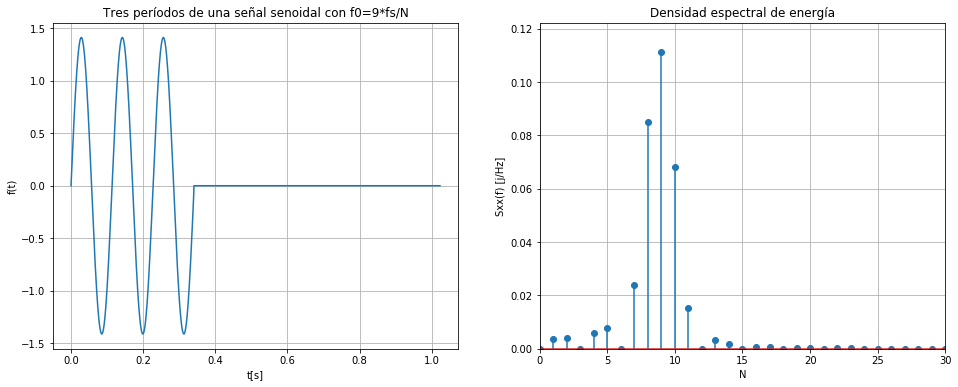

In [24]:
N = 1024
fs = 1000

# Parámetros de la señal
a0 = np.sqrt(2)     #senoidal con energía unitaria
p0 = 0
f0 = 9*fs/N

# Genero la señal
tt,signal = generador_senoidal(fs,f0,N,a0,p0)

# Me quedo con 3 periodos de la senoidal
signal[int(3*fs/f0):]=0

# Obtengo el espectro de la señal
ff,espectro = analizadorEspectro(signal,tt)

# Obtengo la densidad espectral de energía
DEE = 2*np.absolute(espectro/2)**2

# Calculo la energia de la señal
energiaTotal,energiaF0,binMaxAmplitud = energiaSignal(tt,signal,f0)

# Vector con los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ["3/9=%.5f"%(3/9), "%.5f"%(3/9), "%.5f"%(9*(fs/N))+"Hz = 9*(fs/N)" ], 
                  ['', '', ''], 
                  ["%.5f" %energiaTotal,"%.5f" %energiaF0,"%.5f" %(binMaxAmplitud*(fs/N))+"Hz = %d"%binMaxAmplitud+"*(fs/N)"] 
                 ]

# Grafico la señal y su densidad espectral de energía
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Tres períodos de una señal senoidal con f0=9*fs/N")
plt.plot(tt,signal)           
plt.xlabel('t[s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(122)
plt.title("Densidad espectral de energía")
plt.stem(ff*(N/fs), DEE)           
plt.xlabel('N')
plt.ylabel('Sxx(f) [j/Hz]')
plt.axis([0,30,0,np.amax(DEE)*1.1])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La energía en la componente de $f_{0}$ en este caso es igual a $\frac{1}{9}$ de la energía de la componente de $f_{0}$ en el caso de los 9 períodos.  
En comparación al caso donde hay un solo período, la energía en la componente de $f_{0}$ es $\frac{\left | X\left ( f_{0} \right )_{4f} \right |^{2}}{\left | X\left ( f_{0} \right )_{4b} \right |^{2}}=9$ veces más grande.

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**4_g** Idem anterior, pero cada ciclo con diferente amplitud.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/3,0.33333,8.78906Hz = 9*(fs/N)
,,,
simulación,0.36806,0.09000,8.78906Hz = 9*(fs/N)


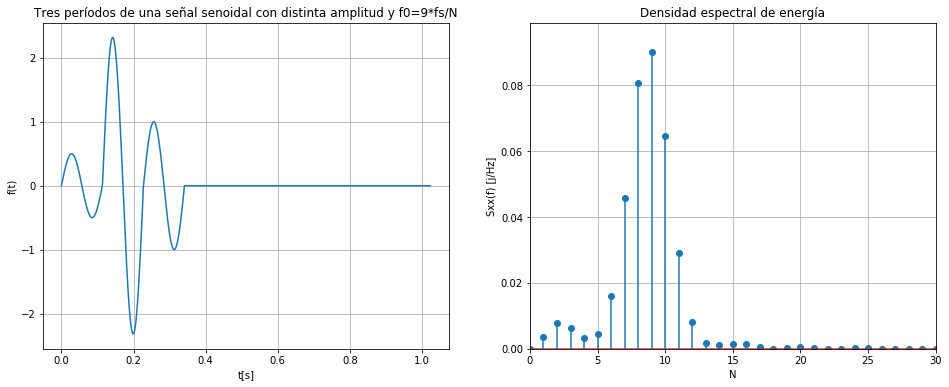

In [25]:
N = 1024
fs = 1000

# Parametros de la senoidal
a1 = 0.5
#a2 = 4.09282828     # Con este valor esta normalizada la energía
a2 = 2.31842424
a3 = 1
p0 = 0
f0 = 9*fs/N

# Genero la 1 senoidal  
tt,signal_1 = generador_senoidal(fs,f0,N,a1,p0)

# Me quedo con 1 período de la senoidal
signal_1[int(1*fs/f0):]=0

# Genero la 2 senoidal  
tt,signal_2 = generador_senoidal(fs,f0,N,a2,p0)

# Me quedo con 1 período de la senoidal
signal_2[int(2*fs/f0):]=0
signal_2[:int(1*fs/f0)+1]=0

# Genero la 3 senoidal  
tt,signal_3 = generador_senoidal(fs,f0,N,a3,p0)

# Me quedo con 1 período de la senoidal
signal_3[int(3*fs/f0):]=0
signal_3[:int(2*fs/f0)]=0

#sumo las senoidales
signal = signal_1 + signal_2 + signal_3

# Obtengo el espectro de la señal
ff,espectro = analizadorEspectro(signal,tt)

# Obtengo la densidad espectral de energía
DEE = 2*np.absolute(espectro/2)**2

# Calculo la energia de la señal
energiaTotal,energiaF0,binMaxAmplitud = energiaSignal(tt,signal,f0)

# Vector con los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ["1/3", "%.5f"%(1/3), "%.5f"%(9*(fs/N))+"Hz = 9*(fs/N)" ], 
                  ['', '', ''], 
                  ["%.5f" %energiaTotal,"%.5f" %energiaF0,"%.5f" %(binMaxAmplitud*(fs/N))+"Hz = %d"%binMaxAmplitud+"*(fs/N)"] 
                 ]

# Grafico la señal y su densidad espectral de energía
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Tres períodos de una señal senoidal con distinta amplitud y f0=9*fs/N")
plt.plot(tt,signal)           
plt.xlabel('t[s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(122)
plt.title("Densidad espectral de energía")
plt.stem(ff*(N/fs), DEE)           
plt.xlabel('N')
plt.ylabel('Sxx(f) [j/Hz]')
plt.axis([0,30,0,np.amax(DEE)*1.1])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Para este caso adopte los valores de amplitud de los períodos de las 3 senoidales de tal forma de tener energía unitaria cuando la señal esta entera. 
La relación entre la energía de las componentes es $\frac{\left | X\left ( f_{0} \right )_{4g} \right |^{2}}{\left | X\left ( f_{0} \right )_{4f} \right |^{2}} = \frac{0.09}{0.11111} = 0.81$ veces.

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**4_h** Idem anterior, pero repetida 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1,,8.78906Hz = 9*(fs/N)
,,,
simulación,1.00000,0.61162,8.78906Hz = 9*(fs/N)


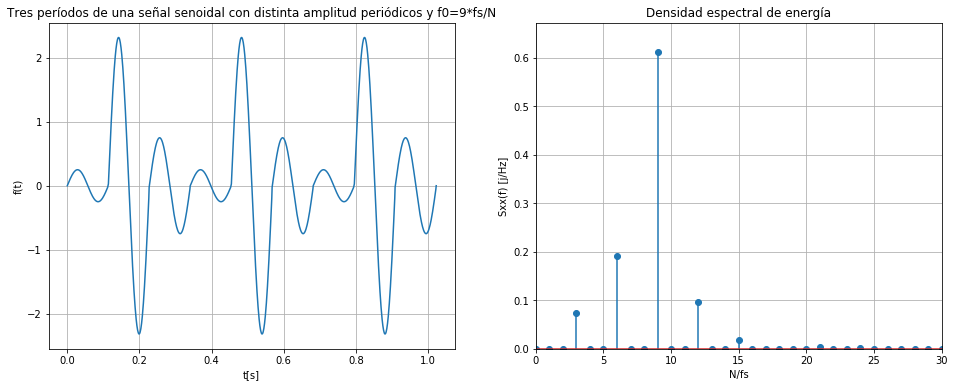

In [26]:
N = 1024
fs = 1000

# Parametros de la senoidal
a1 = 0.25
a2 = 2.31842424
a3 = 0.75
p0 = 0
f0 = 9*fs/N
    
# Genero la 1 senoidal  
tt,signal_1 = generador_senoidal(fs,f0,N,a1,p0)

# Me quedo con 1 periodo de la senoidal
signal_1[int(1*fs/f0):]=0

# Genero la 2 senoidal  
tt,signal_2 = generador_senoidal(fs,f0,N,a2,p0)

# Me quedo con 1 periodo de la senoidal
signal_2[int(2*fs/f0):]=0
signal_2[:int(1*fs/f0)+1]=0

# Genero la 3 senoidal  
tt,signal_3 = generador_senoidal(fs,f0,N,a3,p0)

# Me quedo con 1 periodo de la senoidal
signal_3[int(3*fs/f0):]=0
signal_3[:int(2*fs/f0)]=0

#sumo las senoidales
signal_4 = signal_1 + signal_2 + signal_3

# Me quedo con un periodo de signal (los tres periodos de las senoidales)
# y lo repito tres veces
signal = []
signal[:] = signal_4[:int(3*fs/f0)]
signal[int(3*fs/f0):] = signal_4[:int(3*fs/f0)]
signal[int(6*fs/f0):] = signal_4[:int(3*fs/f0)+1]

# Obtengo el espectro de la señal
ff,espectro = analizadorEspectro(signal,tt)

# Obtengo la densidad espectral de energía
DEE = 2*np.absolute(espectro/2)**2

# Calculo la energia de la señal
energiaTotal,energiaF0,binMaxAmplitud = energiaSignal(tt,signal,f0)

# Vector con los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ["1", "", "%.5f"%(9*(fs/N))+"Hz = 9*(fs/N)" ], 
                  ['', '', ''], 
                  ["%.5f" %energiaTotal,"%.5f" %energiaF0,"%.5f" %(binMaxAmplitud*(fs/N))+"Hz = %d"%binMaxAmplitud+"*(fs/N)"] 
                 ]

# Grafico la señal y su densidad espectral de energía
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Tres períodos de una señal senoidal con distinta amplitud periódicos y f0=9*fs/N")
plt.plot(tt,signal)           
plt.xlabel('t[s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(122)
plt.title("Densidad espectral de energía")
plt.stem(ff*(N/fs), DEE)           
plt.xlabel('N/fs')
plt.ylabel('Sxx(f) [j/Hz]')
plt.axis([0,30,0,np.amax(DEE)*1.1])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En comparación con el inciso anterior $\frac{\left | X\left ( f_{0} \right )_{4h} \right |^{2}}{\left | X\left ( f_{0} \right )_{4g} \right |^{2}} = \frac{ 0.61162}{0.09} = 6.8$ veces mayor.  

En comparación con el primer inciso $\frac{\left | X\left ( f_{0} \right )_{4h} \right |^{2}}{\left | X\left ( f_{0} \right )_{4a} \right |^{2}} = \frac{ 0.61162}{1} = 0.61162$ veces menor

</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">**4_i** En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,2/9=0.22222,0.11111,8.78906Hz = 9*(fs/N)
,,,
simulación,0.22222,0.00000,4.88281Hz = 5*(fs/N)


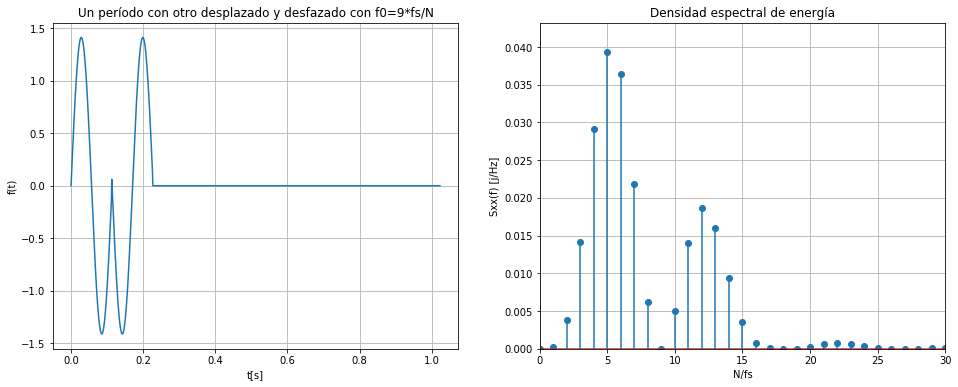

In [27]:
N = 1024
fs = 1000

# Parámetros de la 1° senoidal
a1 = a0     #senoidal con energía unitaria
p1 = 0
f1 = 9*fs/N

# Parámetros de la 2° senoidal
a2 = a0     #senoidal con energía unitaria
p2 = np.pi
f2 = 9*fs/N

# Genero la senoidal 1 
tt,signal_1 = generador_senoidal(fs,f1,N,a1,p1)

# Me quedo con un período de la senoidal
signal_1[int(fs/f1):]=0

# Genero la senoidal 2 
tt,signal_2 = generador_senoidal(fs,f2,N,a2,p2)

# Me quedo con un período de cada señal
signal_2[:int(1*fs/f2)]=0       
signal_2[int(2*fs/f2):]=0

#sumo las senoidales
signal = signal_1 + signal_2

# Obtengo el espectro de la señal
ff,espectro = analizadorEspectro(signal,tt)

# Obtengo la densidad espectral de energía
DEE = 2*np.absolute(espectro/2)**2

# Calculo la energía de la señal
energiaTotal,energiaF0,binMaxAmplitud = energiaSignal(tt,signal,f0)

# Vector con los resultados
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ["2/9=%.5f"%(2/9), "%.5f"%(1/9), "%.5f"%(9*(fs/N))+"Hz = 9*(fs/N)" ], 
                  ['', '', ''], 
                  ["%.5f" %energiaTotal,"%.5f" %energiaF0,"%.5f" %(binMaxAmplitud*(fs/N))+"Hz = %d"%binMaxAmplitud+"*(fs/N)"] 
                 ]

# Grafico la señal y su densidad espectral de energía
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Un período con otro desplazado y desfazado con f0=9*fs/N")
plt.plot(tt,signal)           
plt.xlabel('t[s]')
plt.ylabel('f(t)')
plt.grid(True)

plt.subplot(122)
plt.title("Densidad espectral de energía")
plt.stem(ff*(N/fs), DEE)           
plt.xlabel('N/fs')
plt.ylabel('Sxx(f) [j/Hz]')
plt.axis([0,30,0,np.amax(DEE)*1.1])
plt.grid(True)

# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso la energía de la componente de $f_{0}$ es nula 
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si se desea medir la energía total de la señal es fiable hacerlo mediante el dominio frecuencial sumando los módulos al cuadrado de todas las componentes. Esto también se puede hacer en el dominio del tiempo, entonces no sería recomendado utilizar el espectro para calcular la energía total de la señal ya que primero se necesita realizar la FFT para después calcular la energía.  
Pero si la energía se concentra en determinado ancho de banda, utilizar el dominio de Fourier para medirla resulta apropiado ya que la sumatoria se reduce a las componentes dentro de ese ancho de banda. Si no tomamos en consideración el tiempo que se tarda en hacer la FFT, esto resulta más rápido que calcular la energía en el tiempo donde necesitamos hacer la sumatoria de todas las muestras de la señal.  

</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [28]:
# Cuantizador de señales
def cuantizador(signal,bits,redondeo):
    
    # Dermino las cuentas
    cuentas = 2**(bits-1)-1
    
    # Escalo la señal
    signalQ = signal*cuentas
    
    # Redondeo
    if redondeo == "ROUND":
        signalQ = np.round(signalQ)
    if redondeo == "FLOOR":
        signalQ = np.floor(signalQ)
    if redondeo == "CEIL":
        signalQ = np.ceil(signalQ)
    
    return signalQ

In [29]:
# Función para calcular la energía de una señal en el tiempo
def energiaTiempo(signal):
    
    energia=0
    for x in signal:
        energia += x**2
        
    energia = energia/len(signal)
    
    return energia

In [30]:
# Función para calcular la energía de una señal en el dominio frecuencial 
def energiaFrecuencia(espectro):
    
    energia = 0
    for x in espectro:
        energia += np.absolute(x/2)**2     
    
    energia = energia*2
    
    return energia

,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,0.2199791563,0.2218344552,0.0017507256218597346
8 bits,0.2199791563,0.2200942443,5.326681854663741e-06
16 bits,0.2199791563,0.2199790341,7.435623924319651e-11


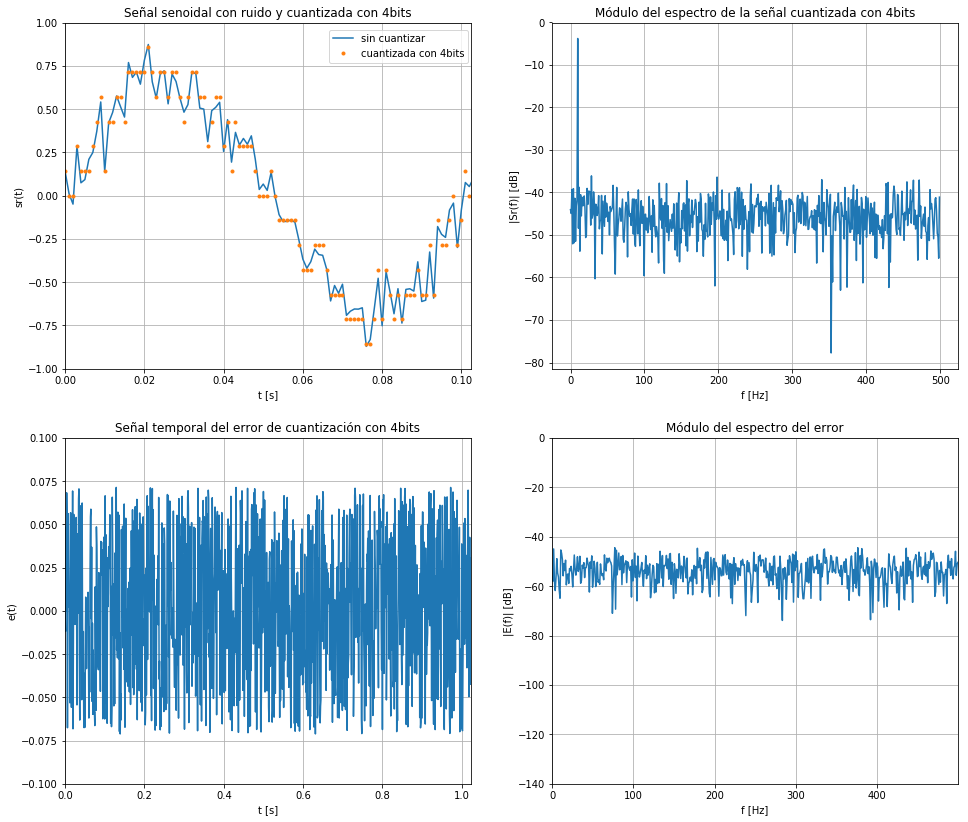

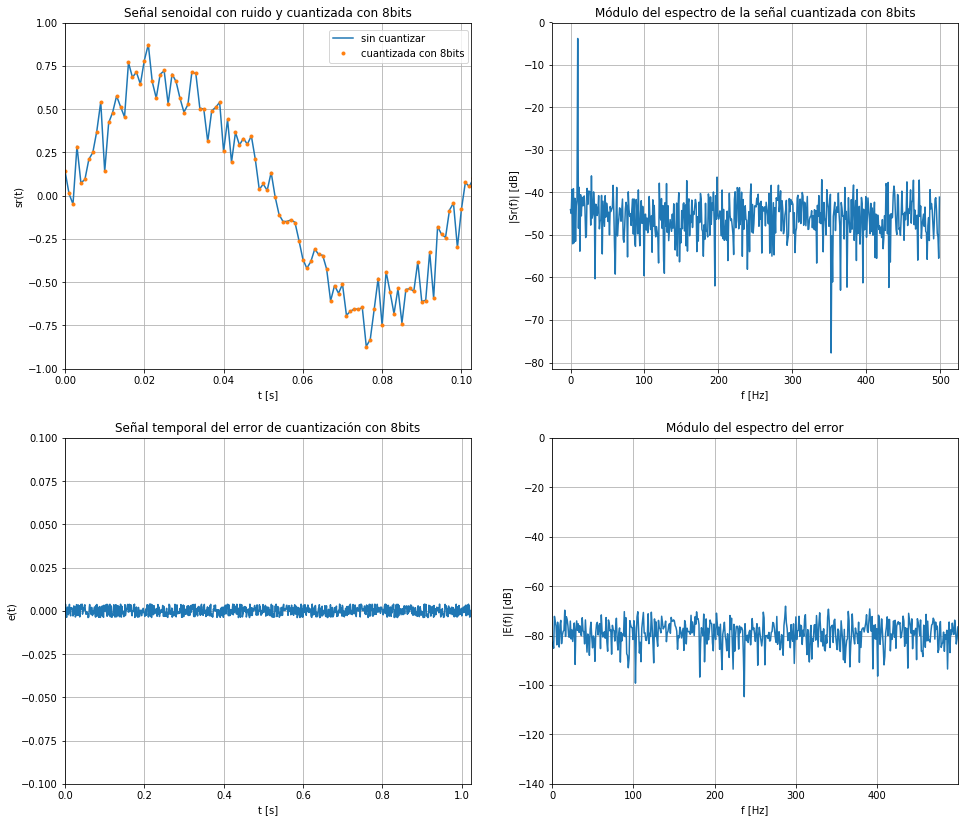

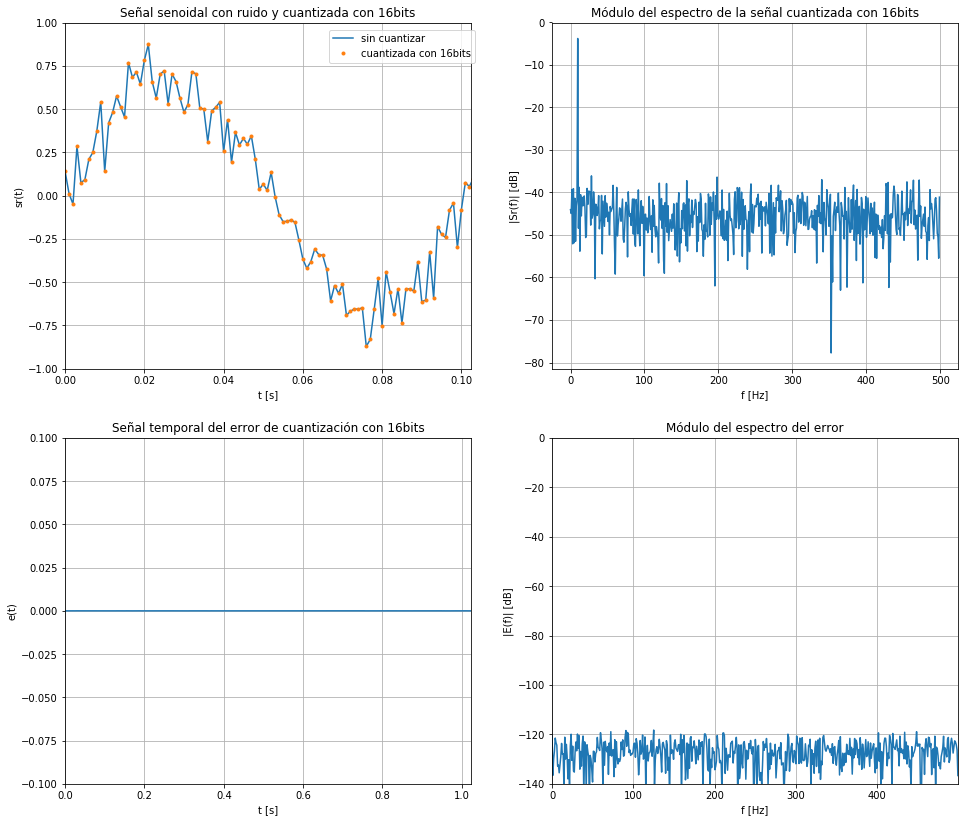

In [31]:
N = 1024
fs = 1000

# Parametros de la senoidal
a0 = np.sqrt(2)     # Senoidal con energía uitaria
p0 = 0
f0 = 10*(fs/N)

# Parametros del cuantizador
bits = [4,8,16]

# Parametros del ruido
u = 0       # Media
v = 0.05    # Varianza

# Vector en donde guardar los resultaos [Energía total,Energía totalQ, Energía total e]
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
               ['',                                             '',                                             ''                              ]]

# Genero señal senoidal 
tt,signal = generador_senoidal(fs,f0,N,a0,p0)

# Genero ruido
tt,ruido = genRuidoNormal(u,v,N,fs)

# Sumo el ruido
signal = signal + ruido

# Calculo la energía total
energiaTotal = energiaTiempo(signal)

# Normalizo la señal respecto del valor máximo para no pasarme del rango del cuantizador
# Esto hace que la energía total no sea unitaria pero se mantiene la relación entre la 
# energía de la senoidal y el ruido
maxS = np.amax(np.abs(signal))
signal = signal/maxS

# Obtengo el espectro de la señal
ff,signalE = analizadorEspectro(signal,tt)

# Calculo la energía total despues de la normalización
energiaTotal = energiaFrecuencia(signalE)

error = []
errorE = []
signalQ = []
signalQE = []
energiaTotalQ = 0
energiaTotale = 0
q = []

for b in bits:

    # Cuentas del cuantizador
    cuentas = 2**(b-1)-1
    q.append(2/(2**b)) 
    
    # Cuantizo la señal
    sQ = cuantizador(signal,b,"ROUND")
    signalQ.append(sQ/cuentas)

    # Obtengo el espectro de la señal cuantizada
    ff,sQE = analizadorEspectro(sQ/cuentas,tt)
    signalQE.append(sQE)

    # Obtengo el error
    e = sQ/cuentas-signal
    error.append(e)

    # Obtengo el espectro del error
    ff,eE = analizadorEspectro(e,tt)
    errorE.append(eE)

    # Calculo la energía total Q
    energiaTotalQ = energiaFrecuencia(sQE)

    # Calculo la energía total e
    energiaTotale = energiaFrecuencia(eE)

    # Guardo los valores de energía en el vector de resultados
    tus_resultados.append(["%.10f"%energiaTotal,"%.10f"%energiaTotalQ,str(energiaTotale)])
    

titulos = [ ["Señal senoidal con ruido y cuantizada con 4bits","Módulo del espectro de la señal cuantizada con 4bits","Señal temporal del error de cuantización con 4bits","Módulo del espectro del error"], 
            ["Señal senoidal con ruido y cuantizada con 8bits","Módulo del espectro de la señal cuantizada con 8bits","Señal temporal del error de cuantización con 8bits","Módulo del espectro del error"],
            ["Señal senoidal con ruido y cuantizada con 16bits","Módulo del espectro de la señal cuantizada con 16bits","Señal temporal del error de cuantización con 16bits","Módulo del espectro del error"]
            ]
labels = ["cuantizada con 4bits","cuantizada con 8bits","cuantizada con 16bits"]


for i in range(len(bits)):
    # Grafico las señales cuantizadas, el error de cuantización y su espectro
    plt.figure(i,figsize=(16,14))
    plt.subplot(221)
    plt.title(titulos[i][0])
    plt.plot(tt,signal,label="sin cuantizar") 
    plt.plot(tt,signalQ[i],".",label=labels[i])
    plt.xlabel('t [s]')
    plt.ylabel('sr(t)')
    plt.axis([0,1/f0,-1,1])
    plt.legend(bbox_to_anchor=(0.65, 0.98), loc=2, borderaxespad=0.)
    plt.grid(True)

    plt.subplot(222)
    plt.title(titulos[i][1])
    plt.plot(ff, 20*np.log10(np.absolute(signalE)))           
    plt.xlabel('f [Hz]')
    plt.ylabel('|Sr(f)| [dB]')
    plt.grid(True)

    plt.subplot(223)
    plt.title(titulos[i][2])
    plt.plot(tt,error[i]) 
    plt.xlabel('t [s]')
    plt.ylabel('e(t)')
    plt.axis([0,tt[-1],-0.10,0.10])
    plt.grid(True)

    plt.subplot(224)
    plt.title(titulos[i][3])
    plt.plot(ff, 20*np.log10(np.absolute(errorE[i])))           
    plt.xlabel('f [Hz]')
    plt.ylabel('|E(f)| [dB]')
    plt.axis([0,ff[-1],-140,0])
    plt.grid(True)
        
       
# Grafico la tabla con valores
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

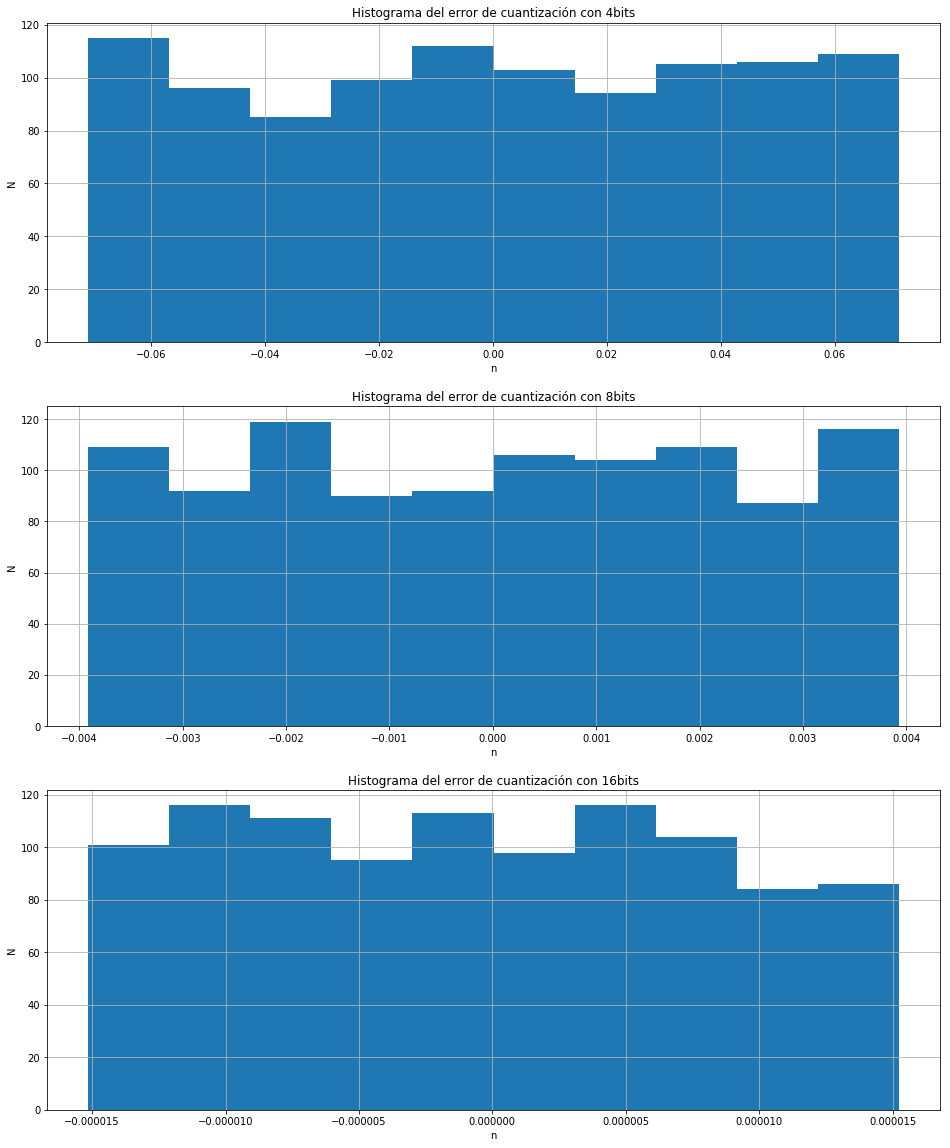

In [32]:
plt.figure(figsize=(16,20))
plt.subplot(311)
plt.title("Histograma del error de cuantización con 4bits")
plt.hist(error[0], 10)
plt.xlabel("n")
plt.ylabel("N")
plt.grid(True)

plt.subplot(312)
plt.title("Histograma del error de cuantización con 8bits")
plt.hist(error[1], 10)
plt.xlabel("n")
plt.ylabel("N")
plt.grid(True)

plt.subplot(313)
plt.title("Histograma del error de cuantización con 16bits")
plt.hist(error[2], 10)
plt.xlabel("n")
plt.ylabel("N")
plt.grid(True)


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se observa que el error de cuantización presenta una distribución uniforme acotada entre $\frac{q}{2}$ y  $-\frac{q}{2}$, donde $q=\frac{2}{2^{bits}}$. De esta manera a medida que aumenta la cantidad de bits del cuantizador disminuye el piso de ruido que impone el mismo. Si el ruido presente en la señal determinística es menor al piso de ruido de cuantización este se ve enmascarado y viceversa. Por este motivo a la hora de dimensionar la etapa de acondicionamiento de la señal y la elección del ADC es importante emparejar estos pisos de ruido para optimizar los recursos.   
Si cambiamos el tipo de redondeo que hace el cuantizador seguimos obteniendo una distribución uniforme pero los límites se modifican. Cuando el redondeo es FLOOR, es decir, se adopta el valor próximo inferior, la distribución del error está acotada entre $-\frac{q}{2}$ y  $0$. Cuando el redondeo es CEIL, se adopta el valor próximo superior y la distribución del error queda acotada entre $0$ y  $\frac{q}{2}$.


</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [33]:
#%%
# Función para calcular el valor medio de una señal
def getValorMedio(signal):
    
    valorMedio = 0
    for x in signal:
        valorMedio += x
    
    valorMedio = valorMedio/len(signal)
    
    return valorMedio

In [34]:
#%%
# Función para calcular el valor RMS de una señal a partir del espectro
def getValorRMS(espectro):
    
    valorRMS = 0
    for x in espectro:
        valorRMS += np.absolute(x/2)**2
    
    valorRMS = np.sqrt(valorRMS*2)
        
    return valorRMS

In [35]:
tus_resultados = []

# Obtengo el valor medio, el valor RMS y la energía total del error
for i in range(len(error)):
    tus_resultados.append([str(getValorMedio(error[i])),"%.10f"%getValorRMS(errorE[i]),str(energiaFrecuencia(errorE[i]))])
    
# Grafico la tabla con los resultados
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,0.0007687285984076976,0.0418416733,0.0017507256218597346
8 bits,3.0539622029744234e-05,0.0023079605,5.326681854663741e-06
16 bits,-4.630139614533588e-07,0.0000086230,7.435623924319651e-11


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [36]:
# Función para calcular la media de una señal
def getMedia(signal):
    
    media = 0
    for x in signal:
        media += x
        
    media = media/len(signal)
        
    return media

In [37]:
# Función para calcular la media de una señal
def getDesvioEstandar(signal):
    
    # Obtengo la media 
    media = 0
    for x in signal:
        media += x
        
    media = media/len(signal)
    
    # Calculo el desvio estandar
    desvioEstandar = 0
    for x in signal:
        desvioEstandar += (x-media)**2
        
    desvioEstandar = np.sqrt(desvioEstandar/len(signal))
        
    return desvioEstandar

In [38]:
tus_resultados = []

# Obtengo la media, el desvio estandar y la varianza del error
sigma = 0
for i in range(len(error)):
    sigma = getDesvioEstandar(error[i])
    tus_resultados.append([str(getMedia(error[i])),"%.10f"%sigma,str(sigma**2)])

df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,0.0007687285984076976,0.0418281142,0.0017495911340121145
8 bits,3.0539622029744234e-05,0.0023118492,5.344646650530498e-06
16 bits,-4.630139614533588e-07,0.0000085983,7.393084238694165e-11


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Mediante la comparación de los parámetros calculados se puede concluir que el valor esperado $ \mu$, el desvío estándar $ \sigma$  y la varianza $\sigma^{2}$ son buenos estimadores del valor medio, valor RMS y energía de la señal de error respectivamente.  
</div>